In [ ]:
# pip install pydot

In [ ]:
# pip install graphviz

In [ ]:
# pip install --upgrade tensorflow


In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
## import dataset
iris_data=sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
attr=iris_data.drop(['species'],axis=1)
target=pd.get_dummies(iris_data.species,prefix='ouput')
print(attr.shape)
print(target.shape)
attr.head()
target.head()

(150, 4)
(150, 3)


,ouput_setosa,ouput_versicolor,ouput_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
attr.head()

In [5]:
## convert the data frames to arrays
X=attr.values
y=target.values
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150, 3)


In [6]:
 #creating test and training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=100)
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.20,random_state=100)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120, 3)
(30, 4)
(30, 3)


In [ ]:
# dropout_rate=0.1
# epochs=50
# batch_size=1
# learn_rate=.001


# model=Sequential()
# model.add(Dense(12, input_dim=x_train.shape[1],activation='relu'))
# model.add(Dropout(dropout_rate))
# model.add(Dense(6, activation='relu'))
# model.add(Dropout(dropout_rate))
# model.add(Dense(y_train.shape[1],activation='softmax'))
# adam=Adam(learning_rate=learn_rate)
# model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [7]:
print(x_train.shape[1])

4


In [8]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

dropout_rate = 0.1
epochs = 50
batch_size = 1
learn_rate = 0.001

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(12, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(6, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(y_train.shape[1], activation='softmax'))

adam = Adam(learning_rate=learn_rate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])



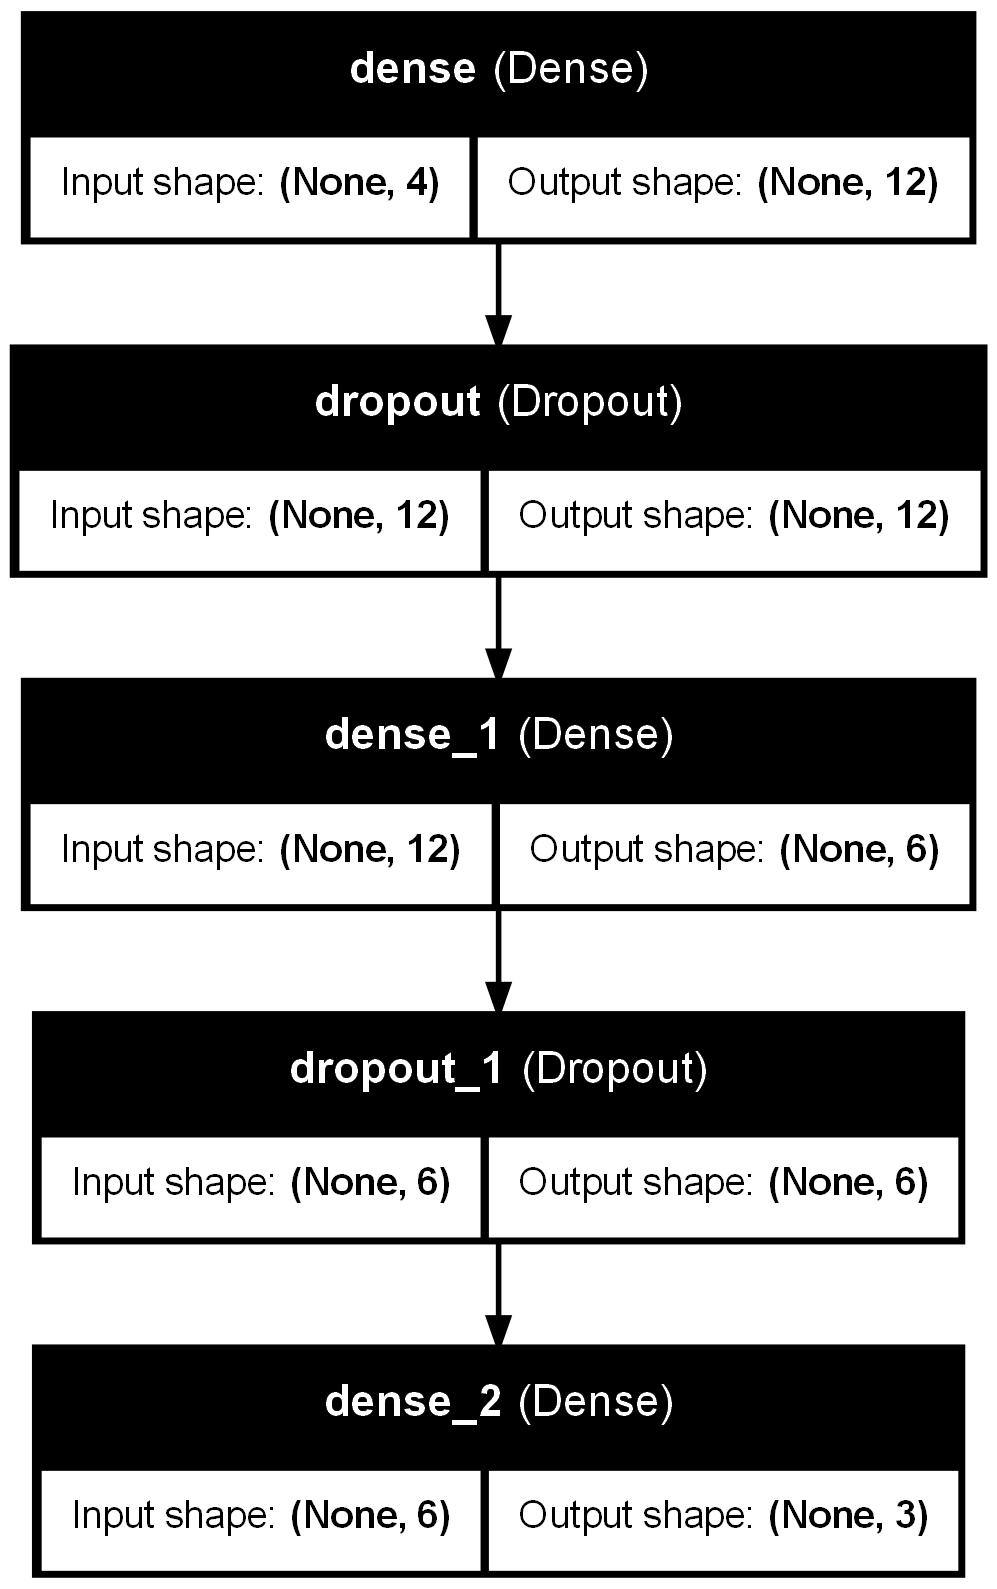

In [9]:
## you nee graphviz for ploting
from tensorflow.keras.utils import plot_model
# run in colab for graphviz plot
plot_model(model,to_file='model_plot1.png',show_shapes=True, show_layer_names=True)

In [10]:
 model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [11]:
model_history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=.2,verbose=1)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3716 - loss: 1.2049 - val_accuracy: 0.2083 - val_loss: 1.1116
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3849 - loss: 1.0632 - val_accuracy: 0.5000 - val_loss: 1.0204
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5778 - loss: 0.9398 - val_accuracy: 0.5833 - val_loss: 0.9275
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6147 - loss: 0.8393 - val_accuracy: 0.5833 - val_loss: 0.8032
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5751 - loss: 0.7911 - val_accuracy: 0.6250 - val_loss: 0.7198
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7264 - loss: 0.6006 - val_accuracy: 0.7500 - val_loss: 0.6525
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.5568 - val_accuracy: 0.7917 - val_loss: 0.5796
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.5205 - val_accuracy: 0.8333 - val_loss:

In [12]:
accuracies = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", accuracies[0])
print("Test Accuracy;", accuracies[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 1.0000 - loss: 0.0852
Test score: 0.08517643809318542
Test Accuracy; 1.0


In [ ]:
# print(accuracies)